# Project: Ford Gobike Data Analysis

<a id='intro'></a>
## Introduction

In this project, I will analyze the data of a bike rental company Ford GoBike’s Trips in San Francisco. I will use FordGoBike Trip data on the month February 2019 as a reference. After gathering the data, I will clean and analyze it, then give insights and visualizations of the analysis of the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#The starting point of data cleaning process 
df_clean = df.copy()

In [4]:
df_clean.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [5]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])
df_clean['bike_id'] = df_clean['bike_id'].astype(object)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(object)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question #1: When are most trips taken in terms of day of the week?

In [6]:
df_clean['day'] = pd.DatetimeIndex(df_clean['start_time']).weekday

In [7]:
day_char = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_clean['day'] = df_clean['day'].map(day_char)

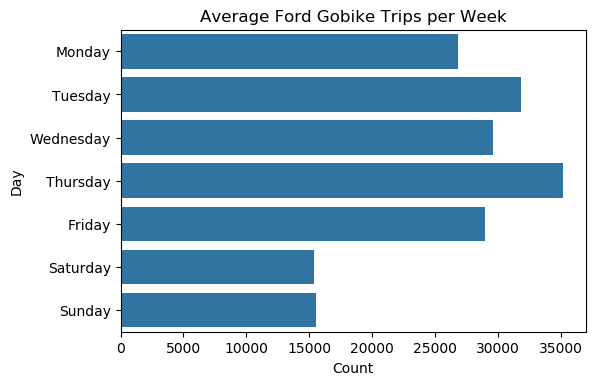

In [8]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(dpi=100);
sns.countplot(y="day",data=df_clean, color=sns.color_palette()[0],order=day_order);
plt.title('Average Ford Gobike Trips per Week')
plt.xlabel('Count')
plt.ylabel('Day');

On average, most trips are taken on the weekdays, with Thursday being the busiest day with over 35000 average trips in a day. This is 20000 over the average number of trips in the Weekend, which are both around 15000 on Saturday and Sunday. The weekday with the lowest average trips is Monday, which has around 26000 trips.



### Research Question #2: What is the most common user type (customer vs subscriber) of Ford Gobike?

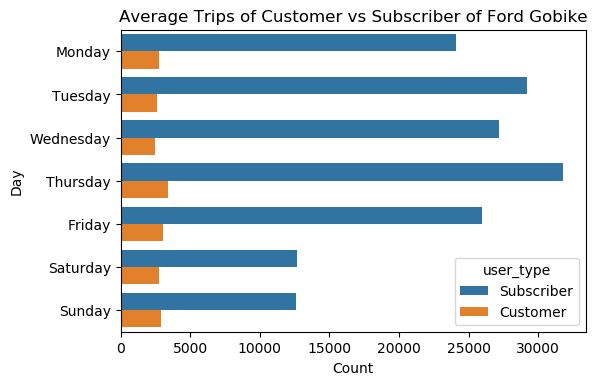

In [9]:
plt.figure(dpi=100);
sns.countplot(y="day", hue = 'user_type', data=df_clean, order = day_order, hue_order = ['Subscriber', 'Customer']);
plt.title('Average Trips of Customer vs Subscriber of Ford Gobike')
plt.xlabel('Count')
plt.ylabel('Day');

From the plot above, most of the users of Ford Gobike are subscribers instead of customers. On weekdays, subscribers use Ford Gobike at least 8 times as much as customers do. On weekends, subscribers use Ford Gobike around 4 times more often than customers do. There is a large difference between the average bike usage of subscribers in weekdays and weekends, but the usage of customers are almost the same everyday. However, both customers and subscribers use the bike most oftenly on Thursdays, which is the day with the highest average trips in a week.

### Research Question #3: When are most trips taken in terms of time of the day?

In [10]:
df_clean['time'] = pd.DatetimeIndex(df_clean['start_time']).time
df_clean['hour'] = df_clean['start_time'].apply(lambda time: time.hour)

In [11]:
df_clean['hour00'] = (df_clean['hour'].astype(str) + '.00')

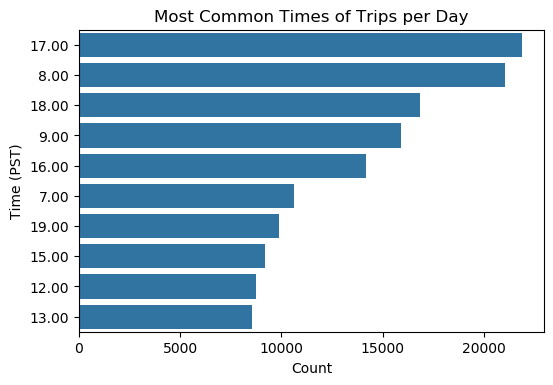

In [12]:
plt.figure(dpi=100);
sns.countplot(y="hour00", data=df_clean, color=sns.color_palette()[0],
              order=df_clean['hour00'].value_counts().iloc[:10].index);
plt.title('Most Common Times of Trips per Day')
plt.xlabel('Count')
plt.ylabel('Time (PST)');

The most common starting times of trips using Ford Gobike are at the end and start of general working hours, which are at 17:00 PST and 8:00 PST with over 20000 trips per day. The third and fourth highest are also at similar hours, which are at 18:00 and 9:00 PST. This is consistent with our plot from research question 1, where most bikes are used on weekdays instead of weekends, indicating the bikes are mostly used to travel to work.

In [13]:
category = []

def time_cat(row):
    if (row['hour'] >= 12) & (row['hour'] <= 17):
        category.append('afternoon')
    elif (row['hour'] >= 18) & (row['hour'] <= 23):
        category.append('night')
    else:
        category.append('morning')

df_clean.apply(time_cat, axis=1)
df_clean['period'] = category

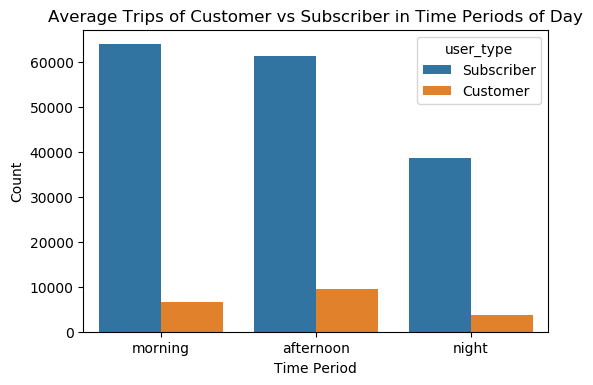

In [14]:
plt.figure(dpi=100);
sns.countplot(x="period", hue = 'user_type', data=df_clean, order = ['morning', 'afternoon', 'night'], hue_order = ['Subscriber', 'Customer']);
plt.title('Average Trips of Customer vs Subscriber in Time Periods of Day')
plt.xlabel('Time Period')
plt.ylabel('Count');

After grouping the time of day into three time periods, i.e. morning (00:00 - 11:59), afternoon (12:00 - 17:59), and night (18:00 - 23:59), and differentiating between customer and subscriber, the two most common time period of trips for subscribers are morning and afternoon, which both have above 60000 trips on average. These are significantly higher than the average number of trips of subscribers at night, which is slightly under 40000 trips. The most common time period for customers is afternoon, with around 10000 trips on average. Both subscribers and customers have the lowest number of trips at night.

### Research Question #4: How long does the average trip take?

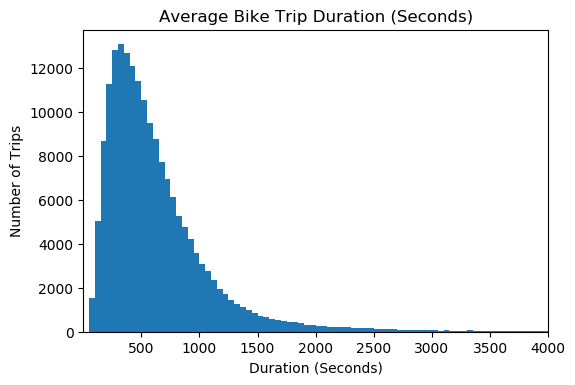

In [15]:
plt.figure(dpi=100);
bin_edges = np.arange(0, df_clean['duration_sec'].max() + 100 , 50)
plt.hist(data = df_clean , x = 'duration_sec', bins = bin_edges)
ticks =  [ 500,1000,1500,2000,2500,3000,3500,4000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks,labels)
plt.xlim(0,4000)
plt.title('Average Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Number of Trips');

In [16]:
df_clean['duration_min'] = df_clean['duration_sec'] / 60

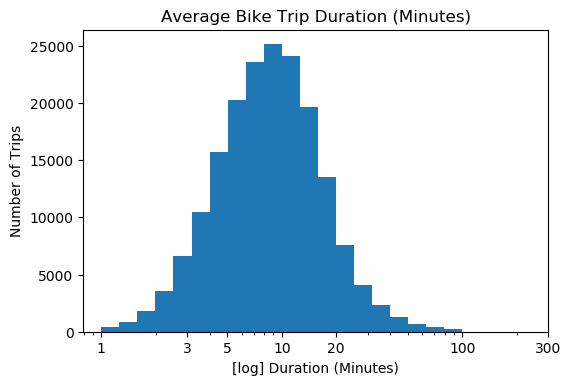

In [17]:
#Log transforming to better understand the data
plt.figure(dpi=100);
bins = 10**np.arange(0 , 2 + 0.1 , 0.1)
ticks =  [ 1 ,3, 5, 10, 20, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_clean , x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('[log] Duration (Minutes)');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

There are two plots to show the average bike trip duration in seconds and in minutes with logarithmic scale. The average bike trip takes around 9 minutes. The bike trip ranges from 1 to 1000 minutes with a left-skewed distribution, meaning that the majority of trips are under 10 minutes.

### Research Question #5: What are the top 10 stations with the most trips?

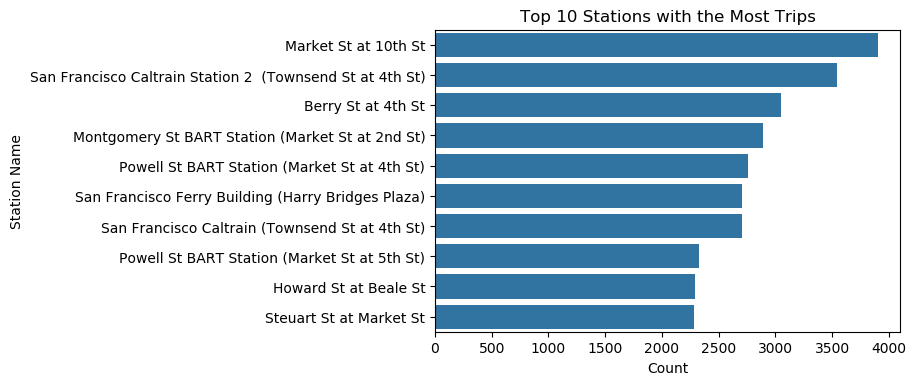

In [18]:
plt.figure(dpi=100);
sns.countplot(y="start_station_name", data=df_clean, color=sns.color_palette()[0],
              order=df_clean['start_station_name'].value_counts().iloc[:10].index);
plt.title('Top 10 Stations with the Most Trips')
plt.xlabel('Count')
plt.ylabel('Station Name');

The top station that has the most number of trips is Market St at 10th St with almost 4000 trips in February 2018. The second leading station is San Fransisco Caltrain Station 2 (Townsend St at 4th St) with about 3500 trips. The third highest is Berry St at 4th St with around 3100 trips. In the next section, I will make further analysis for the top 5 stations with the most trips, which includes the stations mentioned above with Montgomery St BART Station (Market St at 2nd St) and Powell St BART Station (Market St at 4th St).

### Analysis of Top 5 Stations with the Most Trips

In [19]:
df_clean['age'] = df['member_birth_year'].apply(lambda x: 2020-x)

In [20]:
top5_stations = df_clean['start_station_name'].value_counts().iloc[:5].index
df_top5 = df_clean.loc[df_clean['start_station_name'].isin(top5_stations)]

### Total Trips by Time Periods of Day of Top 5 Stations

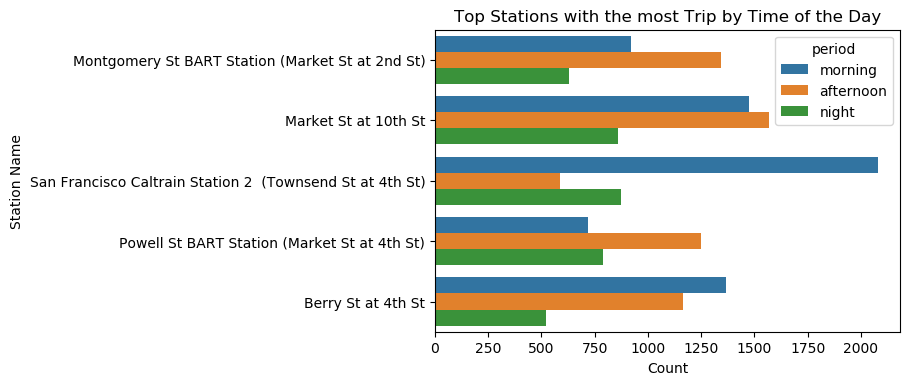

In [28]:
plt.figure(dpi=100);
sns.countplot(data=df_top5, y='start_station_name', hue='period', hue_order = ['morning', 'afternoon', 'night'])
plt.title('Top Stations with the most Trip by Time of the Day')
plt.xlabel('Count')
plt.ylabel('Station Name');

After categorizing the trips by time periods of day for the top 5 stations with the most trips overall, it shows that Market St at 10th St as the station with the most number of trips is only the top station in the afternoon compared to the other 4 stations. In the morning, the station with the most number of trips is San Francisco Caltrain Station 2 (Townsend St at 4th St) with around 2100 total trips in the month. The same station also has the most number of trips at night with around 850 trips, which is similar to the number of trips at Market St at 10th St. Among the 5 stations, the most busy time periods are either morning or afternoon.

### Relationship between Age and Duration

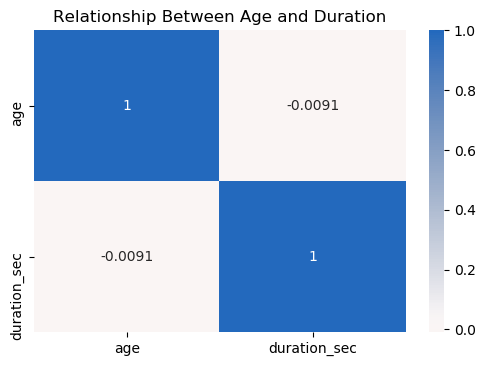

In [22]:
plt.figure(dpi=100);
sns.heatmap(df_top5[['age', 'duration_sec']].corr(), annot = True,cmap = 'vlag_r',center = 0)
plt.title('Relationship Between Age and Duration');

Based on the correlation plot above, there appears to be no correlation between the age of user and the duration (in seconds) of the bike trip.

### Average Trip Duration in Minutes by Gender of Top 5 Stations

/Users/julianoarlo/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/julianoarlo/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


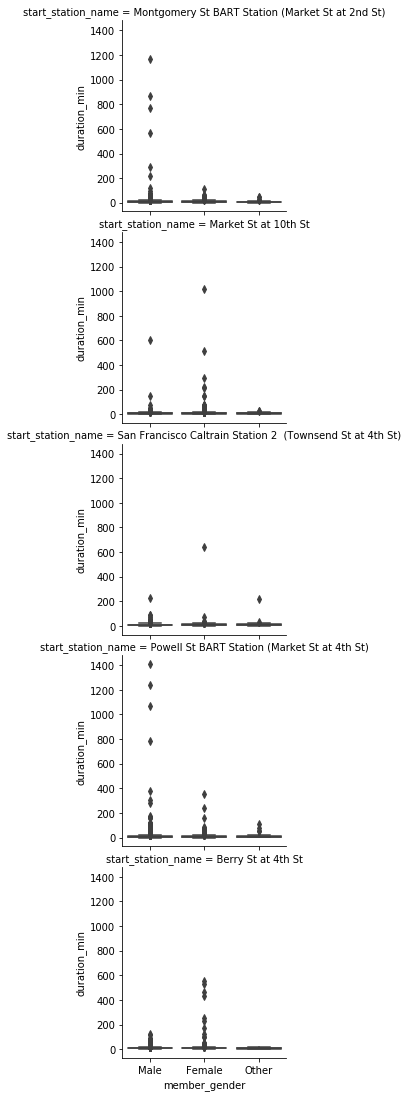

In [23]:
g = sns.FacetGrid(data = df_top5, col = 'start_station_name', margin_titles=True, col_wrap = 1)
g.map(sns.boxplot, 'member_gender', 'duration_min');

/Users/julianoarlo/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/julianoarlo/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


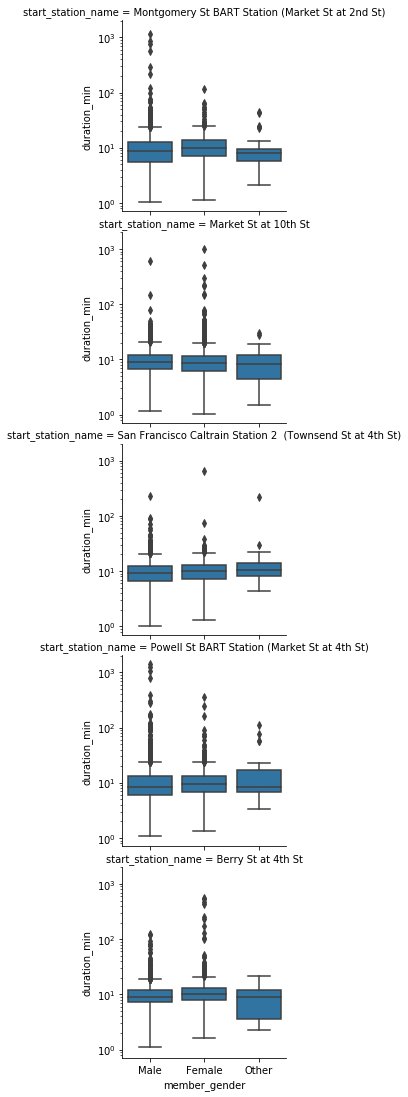

In [24]:
g = sns.FacetGrid(data = df_top5, col = 'start_station_name', margin_titles=True, col_wrap = 1)
g.map(sns.boxplot, 'member_gender', 'duration_min');
plt.yscale('log')

Because the data is heavily skewed and has a lot of outliers, I plotted the average trip duration in minutes in a logarithmic scale. In the resulting plot, there appears to be no substantial difference of average duration of bike trips between members who classify themselves as males, females, or others which is consistent in all five stations. The average duration is around 10 minutes for all genders and stations. Most of the trips take under 10 minutes for all genders and stations.

### Age of Ford Gobike Users of Top 5 Stations by Gender

/Users/julianoarlo/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/julianoarlo/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


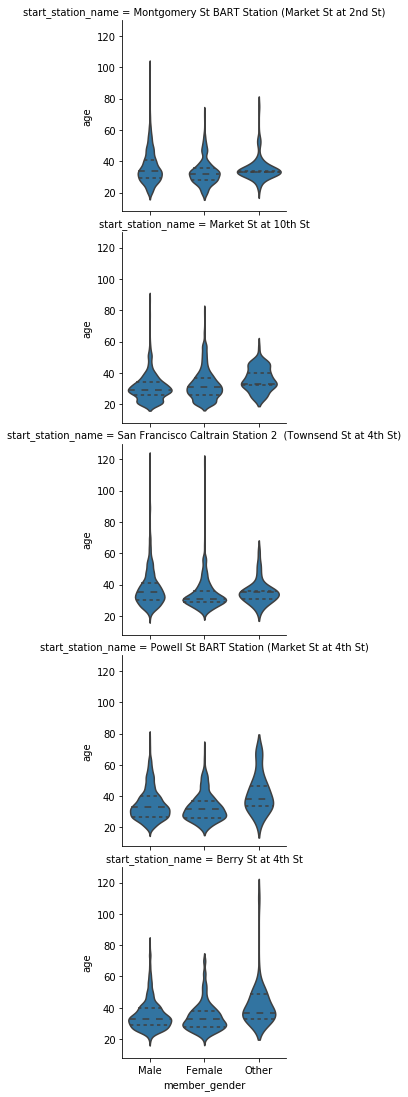

In [25]:
g = sns.FacetGrid(data = df_top5, col = 'start_station_name', margin_titles=True, col_wrap = 1)
g.map(sns.violinplot, 'member_gender', 'age', inner='quartile');

Based on the plot of the bike users’ age categorized by gender of the top 5 stations, most of the bike’s customer are around 25 to 40 years old. There is no consistent difference of age across the users’ gender, and the slight differences in average age are different for each stations. 

### Average Trip Duration in Minutes per Day by User Types

/Users/julianoarlo/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


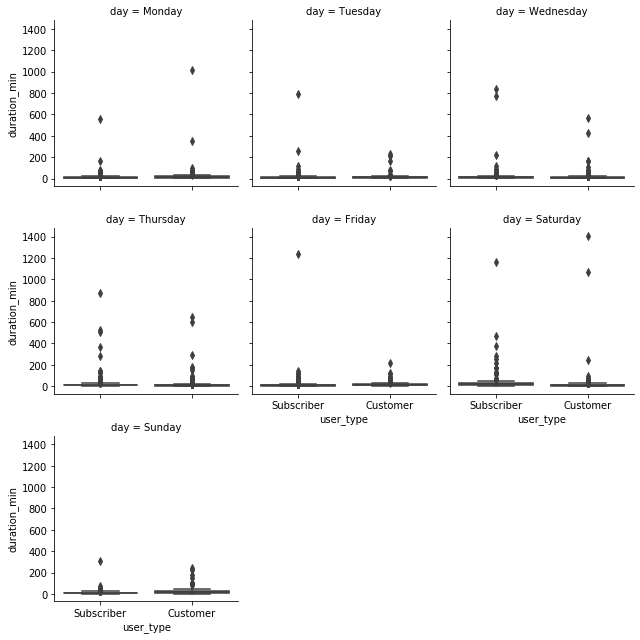

In [26]:
g = sns.FacetGrid(data = df_top5, col = 'day', margin_titles=True, col_wrap = 3, col_order = day_order)
g.map(sns.boxplot, 'user_type', 'duration_min');

/Users/julianoarlo/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


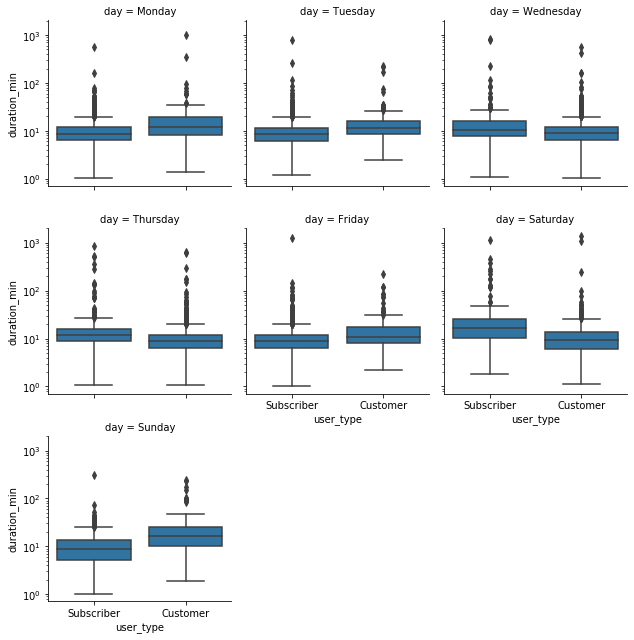

In [27]:
g = sns.FacetGrid(data = df_top5, col = 'day', margin_titles=True, col_wrap = 3, col_order = day_order)
g.map(sns.boxplot, 'user_type', 'duration_min');
plt.yscale('log')

Because the data of average trip duration is heavily skewed and has a lot of outliers like the case before, I plotted the average trip duration in minutes in a logarithmic scale. This results to a plot of average trip durations for Subscribers vs Customers for each day in the week. There is no consistent difference (i.e. customers always have a higher average duration time or vice versa) accross the days of the week, hence a conclusive statement cannot be made.